## Importing the relevant packages


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.arima_model import ARMA
from scipy.stats.distributions import chi2
import statsmodels.tsa.stattools as sts 
import seaborn as sns
sns.set()

## Importing the Data and Pre-processing 

In [2]:
raw_csv_data = pd.read_csv("Index2018.csv") 
df_comp=raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst = True)
df_comp.set_index("date", inplace=True)
df_comp=df_comp.asfreq('b')
df_comp=df_comp.fillna(method='ffill')

In [3]:
df_comp['market_value']=df_comp.ftse

In [4]:
del df_comp['spx']
del df_comp['dax']
del df_comp['ftse']
del df_comp['nikkei']
size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

## LLR Test

In [24]:
def LLR_test(mod_1, mod_2, DF=1):
    L1 = mod_1.llf
    L2 = mod_2.llf
    LR = (2*(L2-L1))
    p = chi2.sf(LR, DF).round(3)
    return p

## The DF-Test

In [6]:
sts.adfuller(df.market_value)

(-1.9041551418836873,
 0.330108932770283,
 6,
 5014,
 {'1%': -3.4316548765428174,
  '5%': -2.8621166146845334,
  '10%': -2.5670769326348926},
 54854.15304507557)

## Using Returns

In [10]:
df['return'] = df.market_value.pct_change(1).mul(100)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [12]:
df= df.iloc[1:]

In [15]:
df.head()

,market_value,return
date,,
1994-01-10,3440.58,-0.156704
1994-01-11,3413.77,-0.779229
1994-01-12,3372.02,-1.222988
1994-01-13,3360.01,-0.356166
1994-01-14,3400.56,1.206842


In [18]:
sts.adfuller(df['return'])

(-12.770265719497228,
 7.798058336038662e-24,
 32,
 4987,
 {'1%': -3.431661944885779,
  '5%': -2.8621197374408225,
  '10%': -2.5670785949998973},
 15696.7672456975)

## ACF and PACF for Returns

Text(0.5, 1.0, 'ACF FTST return')

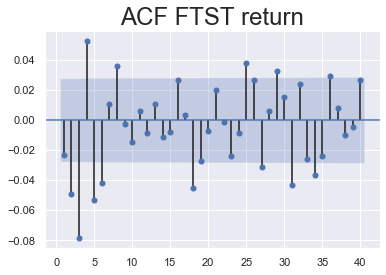

In [19]:
sgt.plot_acf(df['return'], lags=40, zero=False)
plt.title('ACF FTST return', size=24)

Text(0.5, 1.0, 'PACF FTSE return')

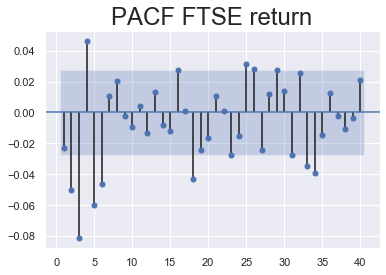

In [20]:
sgt.plot_pacf(df['return'], lags=40, zero=False, method=('ols'))
plt.title('PACF FTSE return', size=24)

## AR(1) for Returns

In [21]:
model_ret_ar1 = ARMA(df['return'], order=(1,0))
result_ret_ar1 = model_ret_ar1.fit()
result_ret_ar1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                 return   No. Observations:                 5020
Model:                     ARMA(1, 0)   Log Likelihood               -7929.749
Method:                       css-mle   S.D. of innovations              1.174
Date:                Wed, 25 Dec 2019   AIC                          15865.497
Time:                        03:46:13   BIC                          15885.061
Sample:                    01-10-1994   HQIC                         15872.353
                         - 04-05-2013                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0188      0.016      1.159      0.247      -0.013       0.051
ar.L1.return    -0.0230      0.014     -1.631      0.103      -0.051       0.005
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1          -43.4386           +0.0000j           43.4386            0.5000
-----------------------------------------------------------------------------
"""

## Higher-Lag AR Models for Returns

In [22]:
model_ret_ar2 = ARMA(df['return'], order=(2,0))
result_ret_ar2 = model_ret_ar2.fit()
result_ret_ar2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                 return   No. Observations:                 5020
Model:                     ARMA(2, 0)   Log Likelihood               -7923.456
Method:                       css-mle   S.D. of innovations              1.173
Date:                Wed, 25 Dec 2019   AIC                          15854.911
Time:                        03:48:41   BIC                          15880.996
Sample:                    01-10-1994   HQIC                         15864.052
                         - 04-05-2013                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0188      0.015      1.220      0.222      -0.011       0.049
ar.L1.return    -0.0242      0.014     -1.716      0.086      -0.052       0.003
ar.L2.return    -0.0500      0.014     -3.550      0.000      -0.078      -0.022
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.2417           -4.4635j            4.4701           -0.2586
AR.2           -0.2417           +4.4635j            4.4701            0.2586
-----------------------------------------------------------------------------
"""

In [26]:
LLR_test(result_ret_ar1, result_ret_ar2)

0.0

In [27]:
model_ret_ar3 = ARMA(df['return'], order=(3,0))
result_ret_ar3 = model_ret_ar3.fit()
result_ret_ar3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                 return   No. Observations:                 5020
Model:                     ARMA(3, 0)   Log Likelihood               -7906.738
Method:                       css-mle   S.D. of innovations              1.169
Date:                Wed, 25 Dec 2019   AIC                          15823.477
Time:                        03:51:33   BIC                          15856.083
Sample:                    01-10-1994   HQIC                         15834.902
                         - 04-05-2013                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0189      0.014      1.330      0.184      -0.009       0.047
ar.L1.return    -0.0283      0.014     -2.011      0.044      -0.056      -0.001
ar.L2.return    -0.0521      0.014     -3.705      0.000      -0.080      -0.025
ar.L3.return    -0.0815      0.014     -5.792      0.000      -0.109      -0.054
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.9233           -2.0210j            2.2219           -0.1818
AR.2            0.9233           +2.0210j            2.2219            0.1818
AR.3           -2.4855           -0.0000j            2.4855           -0.5000
-----------------------------------------------------------------------------
"""

In [28]:
LLR_test(result_ret_ar2, result_ret_ar3)

0.0

In [47]:
model_ret_ar6 = ARMA(df['return'], order=(6,0))
result_ret_ar6 = model_ret_ar6.fit()
result_ret_ar6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                 return   No. Observations:                 5020
Model:                     ARMA(6, 0)   Log Likelihood               -7886.945
Method:                       css-mle   S.D. of innovations              1.164
Date:                Wed, 25 Dec 2019   AIC                          15789.890
Time:                        10:25:31   BIC                          15842.059
Sample:                    01-10-1994   HQIC                         15808.170
                         - 04-05-2013                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0189      0.013      1.414      0.157      -0.007       0.045
ar.L1.return    -0.0245      0.014     -1.740      0.082      -0.052       0.003
ar.L2.return    -0.0523      0.014     -3.716      0.000      -0.080      -0.025
ar.L3.return    -0.0870      0.014     -6.174      0.000      -0.115      -0.059
ar.L4.return     0.0424      0.014      3.009      0.003       0.015       0.070
ar.L5.return    -0.0607      0.014     -4.309      0.000      -0.088      -0.033
ar.L6.return    -0.0466      0.014     -3.302      0.001      -0.074      -0.019
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.2869           -0.9022j            1.5716           -0.0973
AR.2            1.2869           +0.9022j            1.5716            0.0973
AR.3           -0.0727           -1.5282j            1.5299           -0.2576
AR.4           -0.0727           +1.5282j            1.5299            0.2576
AR.5           -1.8659           -0.4836j            1.9275           -0.4596
AR.6           -1.8659           +0.4836j            1.9275            0.4596
-----------------------------------------------------------------------------
"""

## Normalizing Values

In [29]:
benchmark = df.market_value.iloc[0]

In [31]:
df['norm'] = df['market_value'].div(benchmark).mul(100)

In [32]:
sts.adfuller(df['norm'])

(-1.8928710132672337,
 0.3354222074330079,
 6,
 5013,
 {'1%': -3.431655136974821,
  '5%': -2.8621167297421373,
  '10%': -2.567076993884522},
 19553.90073102193)

### normalize data (price) is not yiled stationary data

In [34]:
bench_ret = df['return'].iloc[0]
df['norm_ret'] = df['return'].div(bench_ret).mul(100)
sts.adfuller(df['norm_ret'])

(-12.770265719497226,
 7.798058336038662e-24,
 32,
 4987,
 {'1%': -3.431661944885779,
  '5%': -2.8621197374408225,
  '10%': -2.5670785949998973},
 80114.49116124898)

## Normalized Returns

In [36]:
model_norm_ret_ar1 = ARMA(df.norm_ret, order=(1,0))
result_norm_ret_ar1 = model_norm_ret_ar1.fit()
result_norm_ret_ar1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:               norm_ret   No. Observations:                 5020
Model:                     ARMA(1, 0)   Log Likelihood              -40351.743
Method:                       css-mle   S.D. of innovations            749.388
Date:                Wed, 25 Dec 2019   AIC                          80709.487
Time:                        09:55:48   BIC                          80729.050
Sample:                    01-10-1994   HQIC                         80716.342
                         - 04-05-2013                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -11.9731     10.339     -1.158      0.247     -32.237       8.291
ar.L1.norm_ret    -0.0230      0.014     -1.631      0.103      -0.051       0.005
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1          -43.4387           +0.0000j           43.4387            0.5000
-----------------------------------------------------------------------------
"""

In [37]:
model_norm_ret_ar2 = ARMA(df.norm_ret, order=(2,0))
result_norm_ret_ar2 = model_norm_ret_ar2.fit()
result_norm_ret_ar2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:               norm_ret   No. Observations:                 5020
Model:                     ARMA(2, 0)   Log Likelihood              -40345.450
Method:                       css-mle   S.D. of innovations            748.449
Date:                Wed, 25 Dec 2019   AIC                          80698.901
Time:                        09:57:04   BIC                          80724.985
Sample:                    01-10-1994   HQIC                         80708.041
                         - 04-05-2013                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -11.9731      9.834     -1.218      0.223     -31.247       7.301
ar.L1.norm_ret    -0.0242      0.014     -1.716      0.086      -0.052       0.003
ar.L2.norm_ret    -0.0500      0.014     -3.550      0.000      -0.078      -0.022
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.2417           -4.4635j            4.4701           -0.2586
AR.2           -0.2417           +4.4635j            4.4701            0.2586
-----------------------------------------------------------------------------
"""

In [38]:
model_norm_ret_ar7 = ARMA(df.norm_ret, order=(7,0))
result_norm_ret_ar7 = model_norm_ret_ar7.fit()
result_norm_ret_ar7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:               norm_ret   No. Observations:                 5020
Model:                     ARMA(7, 0)   Log Likelihood              -40308.642
Method:                       css-mle   S.D. of innovations            742.977
Date:                Wed, 25 Dec 2019   AIC                          80635.283
Time:                        09:57:36   BIC                          80693.974
Sample:                    01-10-1994   HQIC                         80655.849
                         - 04-05-2013                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -11.9731      8.630     -1.387      0.165     -28.887       4.941
ar.L1.norm_ret    -0.0240      0.014     -1.702      0.089      -0.052       0.004
ar.L2.norm_ret    -0.0517      0.014     -3.663      0.000      -0.079      -0.024
ar.L3.norm_ret    -0.0874      0.014     -6.202      0.000      -0.115      -0.060
ar.L4.norm_ret     0.0433      0.014      3.064      0.002       0.016       0.071
ar.L5.norm_ret    -0.0601      0.014     -4.263      0.000      -0.088      -0.032
ar.L6.norm_ret    -0.0463      0.014     -3.282      0.001      -0.074      -0.019
ar.L7.norm_ret     0.0109      0.014      0.772      0.440      -0.017       0.039
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.6490           -0.5384j            1.7347           -0.4498
AR.2           -1.6490           +0.5384j            1.7347            0.4498
AR.3           -0.1189           -1.4954j            1.5001           -0.2626
AR.4           -0.1189           +1.4954j            1.5001            0.2626
AR.5            1.2790           -0.9786j            1.6105           -0.1039
AR.6            1.2790           +0.9786j            1.6105            0.1039
AR.7            5.2269           -0.0000j            5.2269           -0.0000
-----------------------------------------------------------------------------
"""

In [39]:
model_norm_ret_ar6 = ARMA(df.norm_ret, order=(6,0))
result_norm_ret_ar6 = model_norm_ret_ar6.fit()
result_norm_ret_ar6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:               norm_ret   No. Observations:                 5020
Model:                     ARMA(6, 0)   Log Likelihood              -40308.939
Method:                       css-mle   S.D. of innovations            743.021
Date:                Wed, 25 Dec 2019   AIC                          80633.879
Time:                        10:22:19   BIC                          80686.048
Sample:                    01-10-1994   HQIC                         80652.160
                         - 04-05-2013                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -12.0728      8.536     -1.414      0.157     -28.804       4.658
ar.L1.norm_ret    -0.0245      0.014     -1.740      0.082      -0.052       0.003
ar.L2.norm_ret    -0.0523      0.014     -3.716      0.000      -0.080      -0.025
ar.L3.norm_ret    -0.0870      0.014     -6.174      0.000      -0.115      -0.059
ar.L4.norm_ret     0.0424      0.014      3.009      0.003       0.015       0.070
ar.L5.norm_ret    -0.0607      0.014     -4.309      0.000      -0.088      -0.033
ar.L6.norm_ret    -0.0466      0.014     -3.302      0.001      -0.074      -0.019
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.2869           -0.9022j            1.5717           -0.0973
AR.2            1.2869           +0.9022j            1.5717            0.0973
AR.3           -0.0727           -1.5282j            1.5299           -0.2576
AR.4           -0.0727           +1.5282j            1.5299            0.2576
AR.5           -1.8658           -0.4837j            1.9275           -0.4596
AR.6           -1.8658           +0.4837j            1.9275            0.4596
-----------------------------------------------------------------------------
"""

## Analysing the Residuals

In [48]:
df['res_ret'] = result_ret_ar6.resid

In [49]:
df['res_ret'].head()

date
1994-01-10   -0.175623
1994-01-11   -0.802198
1994-01-12   -1.270028
1994-01-13   -0.466065
1994-01-14    1.061277
Freq: B, Name: res_ret, dtype: float64

In [50]:
df.res_ret.var()

1.3559802110690937

In [51]:
df.res_ret.mean()

-5.3728569435407e-05

In [52]:
sts.adfuller(df.res_ret)

(-70.78379938556968,
 0.0,
 0,
 5019,
 {'1%': -3.4316535759402753,
  '5%': -2.8621160400844468,
  '10%': -2.567076626752987},
 15692.570834326676)